# Dog Breed Analysis
![alt text](puppytraining.jpeg "Title")
1. Data cleaning
2. EDA
3. PCA / Recommendation
    - Euclidian distance
    - PCA with K mean clustering
    - matrix factorization
4. Compare

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("dog_data.csv")

In [86]:
df.head(3)

,Unnamed: 0,dog,height,weight,life_expectancy,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Mental Stimulation Needs,popularity_rank,color,marking,breed_info,health,grooming,excercise,training,nutrition
0,0,Affenpinscher,9-11.5 inches,7-10 pounds,12-15 years,3,3,3,3,3,...,3,148 of 202,Belge-Black-Black & Silver-Black & Tan-Red,Black Mask,"Loyal, curious, and famously amusing, this alm...",Owning a dog is not just a privilege; it’s a r...,"Affenpinschers are generally healthy dogs, and...","The Affenpinscher's medium-length, wiry coat s...",One of the attractions of the toy breeds is th...,"Affenpinschers are courageous, bold, and often..."
1,1,Afghan-Hound,25-27 inches,50-60 pounds,12-18 years,3,3,3,1,4,...,3,113 of 202,Black-Black & Silver-Black & Tan-Blue-Cream-Re...,Black Mask-Brindle-Brindle Black Mask-Brindle ...,"Among the most eye-catching of all dog breeds,...",Owning a dog is not just a privilege; it’s a r...,Sighthounds such as Afghans have naturally low...,"Afghan puppies have short, fuzzy coats (includ...","Because Afghans are sighthounds, bred to hunt ...","Afghans are independent, dignified, and aloof ..."
2,2,Airedale-Terrier,23 inches,50-70 pounds,11-14 years,3,3,3,1,3,...,3,60 of 202,Black & Tan-Grizzle & Tan,NaN,"His size, strength, and unflagging spirit have...",Owning a dog is not just a privilege; it’s a r...,"Airedales are generally healthy dogs, and resp...","The Airedale has a short, wiry coat that needs...",Terriers are generally known for their high en...,Because of the Airedale's size (he is a medium...


In [87]:
df.columns

Index(['Unnamed: 0', 'dog', 'height', 'weight', 'life_expectancy',
       'Affectionate With Family', 'Good With Young Children',
       'Good With Other Dogs', 'Shedding Level', 'Coat Grooming Frequency',
       'Drooling Level', 'Coat Type', 'Coat Length', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'popularity_rank', 'color', 'marking',
       'breed_info', 'health', 'grooming', 'excercise', 'training',
       'nutrition'],
      dtype='object')

### 1. Data Cleaning
#### we will be cleaning height, weight, life expectancy and poplarity ranking

In [88]:
# Let's do data cleaning for height, weight, life expectancy, popularity ranking


def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

def hwl_clean(height): # height weight life clean
    height = str(height)
    height_list = height.split('-')
    result = []
    for word in height_list:
        result = result + word.split(" ")
    avg_val = 0
    count = 0
    for i in result:
        if is_number(i):
            count = count +1
            avg_val = avg_val + float(i)
    if count != 0:
        avg_val = avg_val / count
        return avg_val
    else:
        return 0

df['height_c'] = df['height'].apply(hwl_clean)
df['weight_c'] = df['weight'].apply(hwl_clean)
df['life_c'] = df['life_expectancy'].apply(hwl_clean)
df.drop(['height','weight','life_expectancy'], axis = 1,inplace = True)

In [89]:
df[['height_c','weight_c','life_c']].isnull().sum()
# we are missing 10,20,2 values from height, weight and life respectively

height_c    10
weight_c    20
life_c       2
dtype: int64

In [90]:
# Let's do data cleaning for popularity
def popular_clean(pop):
    if type(pop) == float:
        return np.nan
    else:
        rank_list = pop.split(" of ")
        measure = int(rank_list[0]) / int(rank_list[1])
        return 1 - measure

df['popularity_rank_c']= df['popularity_rank'].apply(popular_clean)
df.drop('popularity_rank', axis = 1, inplace = True)
df['Coat Length'].value_counts()

Short           121
Medium          104
Long             37
Short-Medium      6
Medium-Long       3
Short-Long        1
Name: Coat Length, dtype: int64

In [91]:
# Coat Length has to be cleaned
df[df['Coat Length'] == 'Short-Long']
def coatLen_clean(coat):
    if type(coat) != float:
        if "Long" in coat:
            return 3
        elif "Medium" in coat:
            return 2
        else:
            return 1
    else:
        return np.nan

df["Coat_Length_c"] = df["Coat Length"].apply(coatLen_clean)
df.drop("Coat Length", axis = 1, inplace= True)

In [92]:
coat_dict = {}
for i in df["Coat Type"]:
    if type(i) != float:
        coat_list = i.split('-')
        for coat in coat_list:
            if coat not in coat_dict:
                coat_dict[coat] = 1
            else:
                coat_dict[coat] = coat_dict[coat] + 1

new_dict = dict(sorted(coat_dict.items(), key=lambda item: item[1], reverse= True))
new_dict

{'Double': 130,
 'Smooth': 102,
 'Wiry': 35,
 'Wavy': 25,
 'Silky': 21,
 'Curly': 17,
 'Rough': 11,
 'Corded': 4,
 'Hairless': 3}

In [93]:
def coat_clean(coat):
    if type(coat) != float:
        if 'Double' in coat:
            return 'Double'
        elif 'Smooth' in coat:
            return 'Smooth'
        elif 'Wiry' in coat:
            return 'Wiry'
        elif 'Silky' in coat:
            return 'Silky'
        elif 'Curly' in coat:
            return 'Curly'
        elif 'Rough' in coat:
            return 'Rough'
        elif 'Corded' in coat:
            return 'Corded'
        elif 'Hairless' in coat:
            return 'Hairless'
    else:
        return np.nan
df['coat_c'] = df['Coat Type'].apply(coat_clean)
df.drop("Coat Type", axis = 1, inplace = True)
df.drop("marking", axis = 1, inplace = True)
df.drop("color", axis = 1, inplace = True)

In [94]:
# reorganize in the way that I like to see

df = df[['dog','popularity_rank_c','height_c', 'weight_c', 'life_c','Coat_Length_c', 'coat_c','Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition']]

### 2. EDA
#### 1) histogram for qunatative data
#### 2) histogram for categorical data

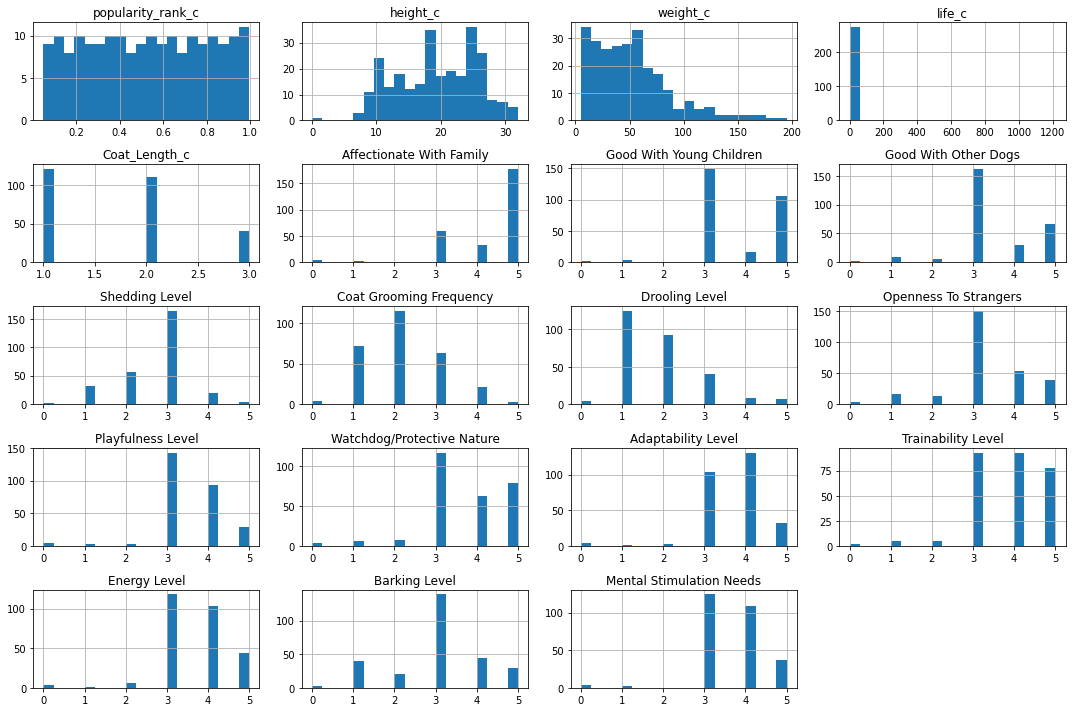

In [95]:
df.hist(bins = 20, figsize = (15,10))
plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 157 missing from current font.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 157 missing from current font.



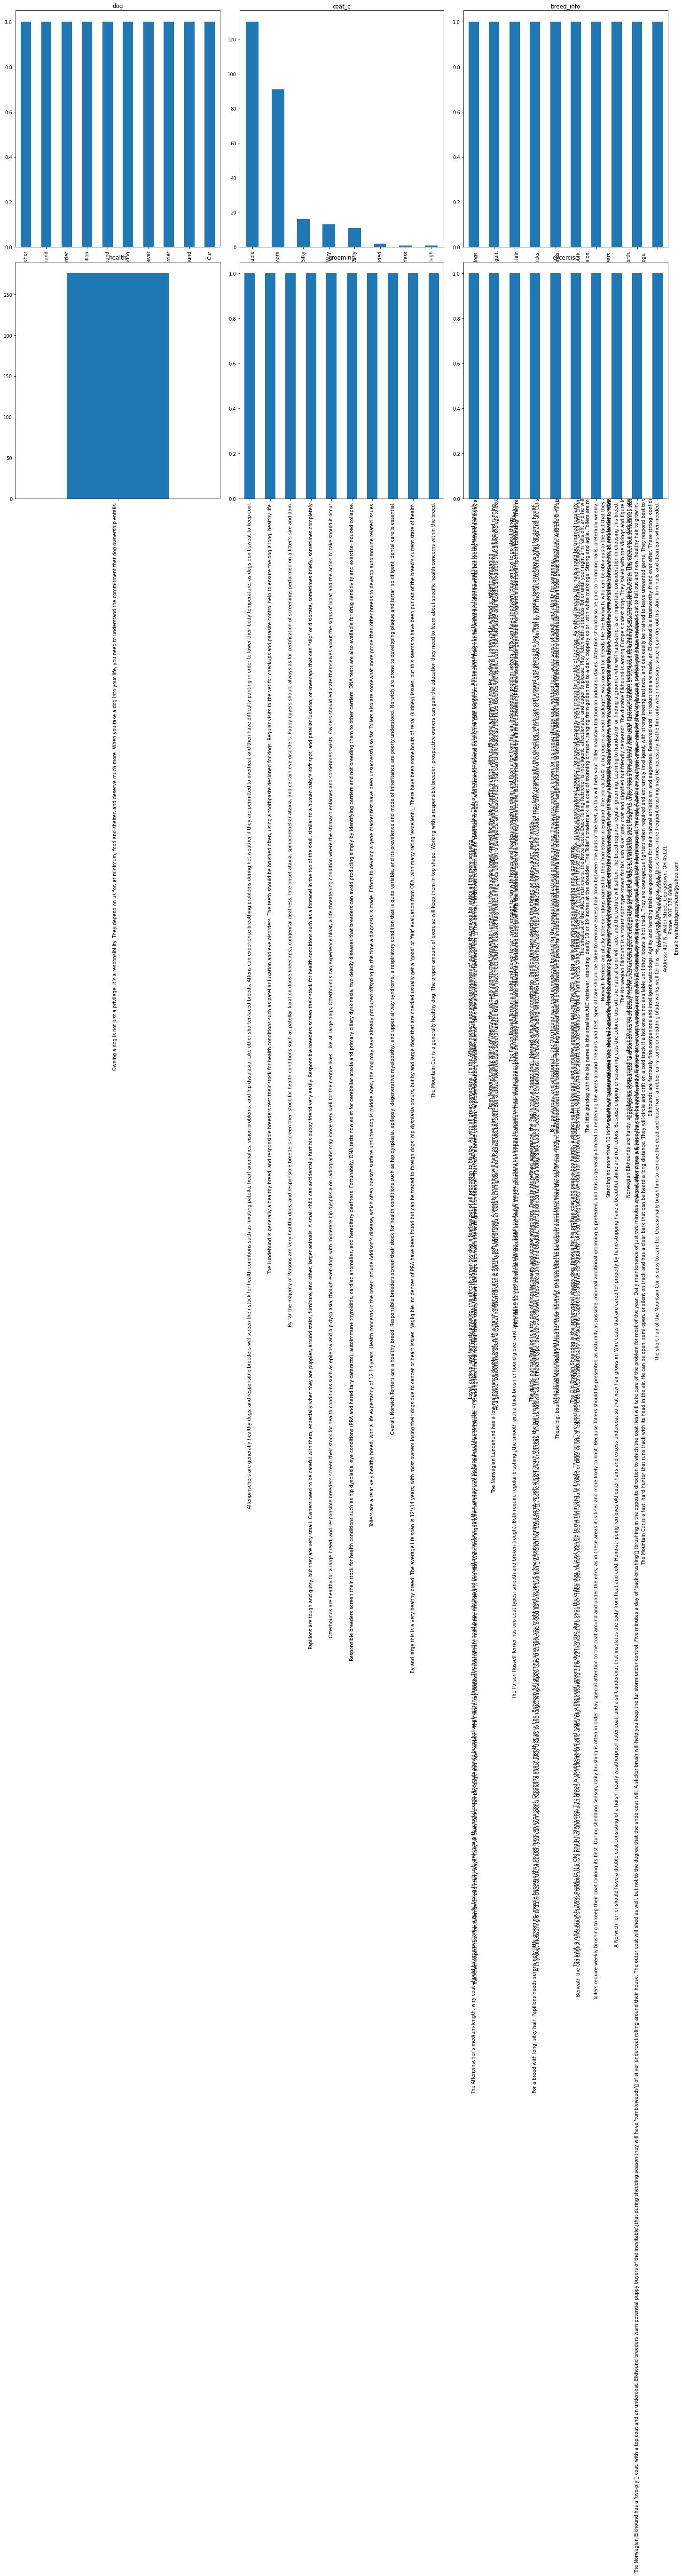

In [96]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_features = list(categorical_data.columns)

fig, ax = plt.subplots(2, 3, figsize = (20,15))
fig.tight_layout()
axe = ax.ravel()

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().head(10).plot(kind = "bar", ax=axe[i]).set_title(categorical_feature)
fig.show()

# print(len(df.columns))

# # numeric_data = df.select_dtypes(include=[np.number])
# # categorical_data = df.select_dtypes(exclude=[np.number])
# categorical_features

### 3. PCA
#### I want to see which dogs are "similar" in sense

In [ ]:
# for pca, we will be choosing
df.columns

Index(['dog', 'popularity_rank_c', 'height_c', 'weight_c', 'life_c',
       'Coat_Length_c', 'coat_c', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition'],
      dtype='object')

In [ ]:
df_pca = df.drop(['breed_info', 'health', 'grooming', 'excercise', 'training', 'nutrition'], axis =1) # drop columns with text
# df_pca = pd.get_dummies(df_pca.drop('dog', axis = 1))


print(df_pca.shape)
df_pca.dropna(inplace = True)
print(df_pca.shape)

(276, 21)
(180, 21)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca.drop(['dog','coat_c'], axis = 1))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
     n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42 )
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, random_state=42)

[0.2132907  0.15888459]


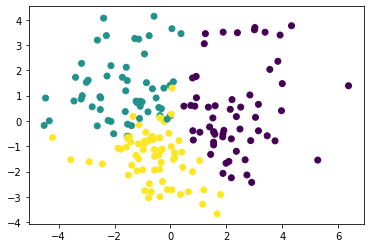

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)
plt.scatter(components[:,0],components[:,1], c= kmeans.labels_)

In [ ]:
import plotly.express as px
df1 = components
fig = px.scatter(df1, x=df1[:,0], y=df1[:,1], color = kmeans.labels_, hover_name = df_pca.dog)
fig.show()